# Quick Start
This quickstart uses a sample of the [NYPD Motor Vehicle Collisions Dataset](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95) 
dataset.

In [1]:
import quilt
import numpy as np
import pandas as pd

## Load the data into memory

In [2]:
from quilt.data.ResidentMario import missingno_data

collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
collisions

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
5,5,04/15/2016,10:50:00,MANHATTAN,10023.0,40.779364,-73.977368,"(40.7793641, -73.9773678)",COLUMBUS AVENUE,WEST 75 STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
6,6,11/10/2016,20:11:00,BRONX,10471.0,40.897568,-73.896961,"(40.8975679, -73.8969612)",NaN,NaN,...,Failure to Yield Right-of-Way,Unsafe Speed,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
7,7,04/15/2016,11:30:00,QUEENS,11434.0,40.659651,-73.773828,"(40.6596509, -73.7738282)",ROCKAWAY BOULEVARD,FARMERS BOULEVARD,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
8,8,04/15/2016,12:00:00,BROOKLYN,11238.0,40.677285,-73.962545,"(40.6772855, -73.9625453)",GRAND AVENUE,SAINT MARKS AVENUE,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,MOTORCYCLE,NaN,NaN,NaN,NaN
9,9,04/15/2016,12:50:00,QUEENS,11411.0,40.700964,-73.732433,"(40.7009644, -73.732433)",114 ROAD,225 STREET,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


The rest of this walkthrough will draw from this `collisions` dataset. I additionally define **nullity** to mean 
whether a particular variable is filled in or not.

### Matrix

The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in
 data completion.

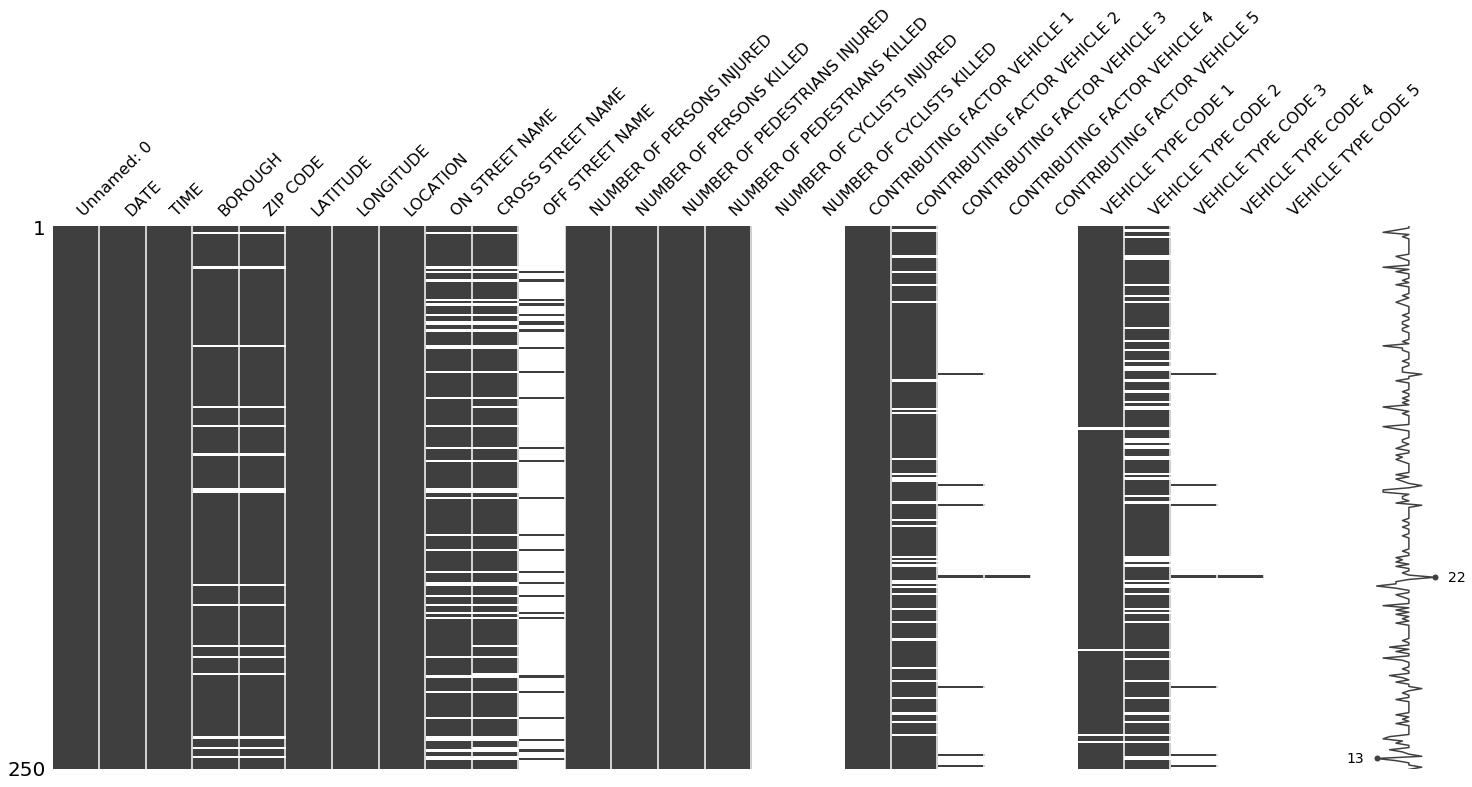

In [4]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be
completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum
rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap
or become unreadable, and by default large displays omit them.


If you are working with time-series data, you can [specify a periodicity](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases)
using the `freq` keyword parameter:

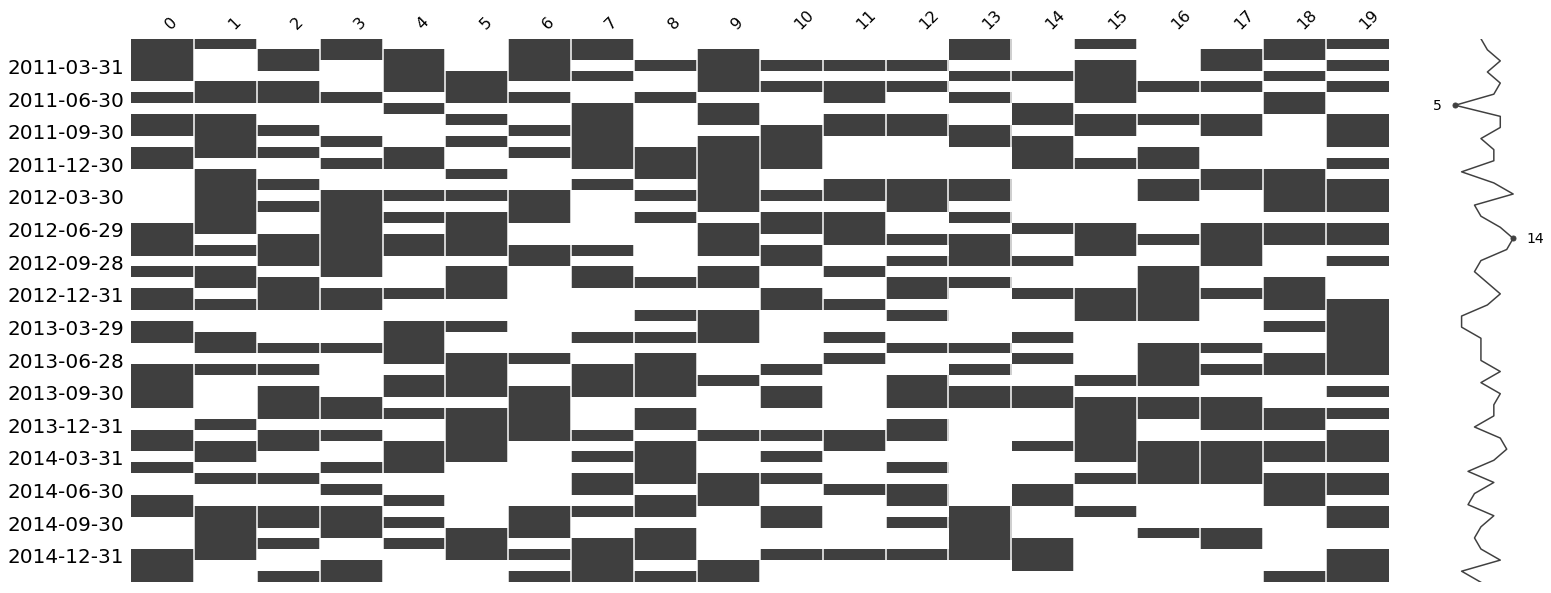

In [5]:
import pandas as pd
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

### Bar Chart

`msno.bar` is a simple visualization of nullity by column:


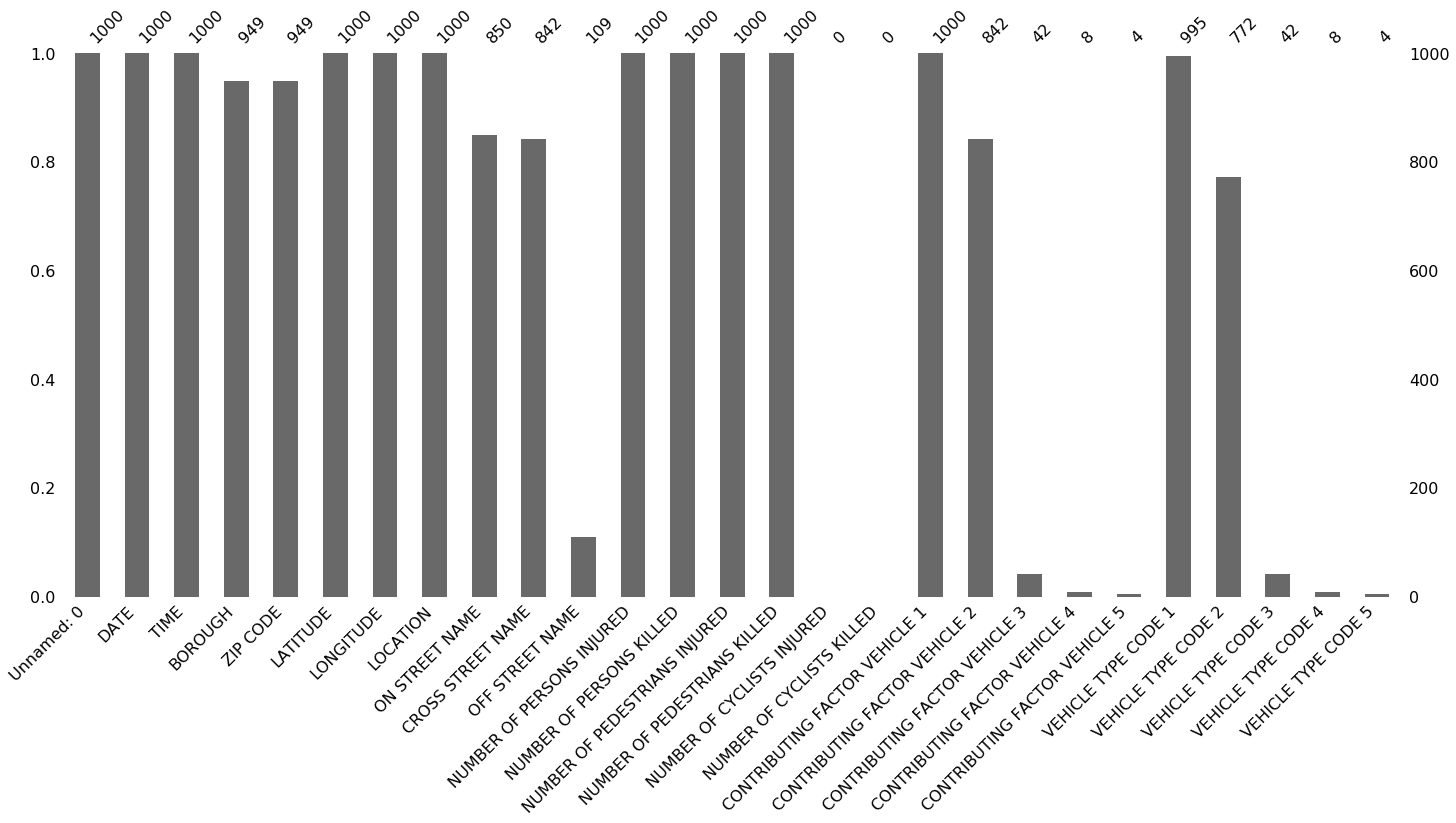

In [6]:
msno.bar(collisions.sample(1000))

You can switch to a logarithmic scale by specifying `log=True`. `bar` provides the same information as `matrix`, but in 
a simpler format.

### Heatmap

The `missingno` correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

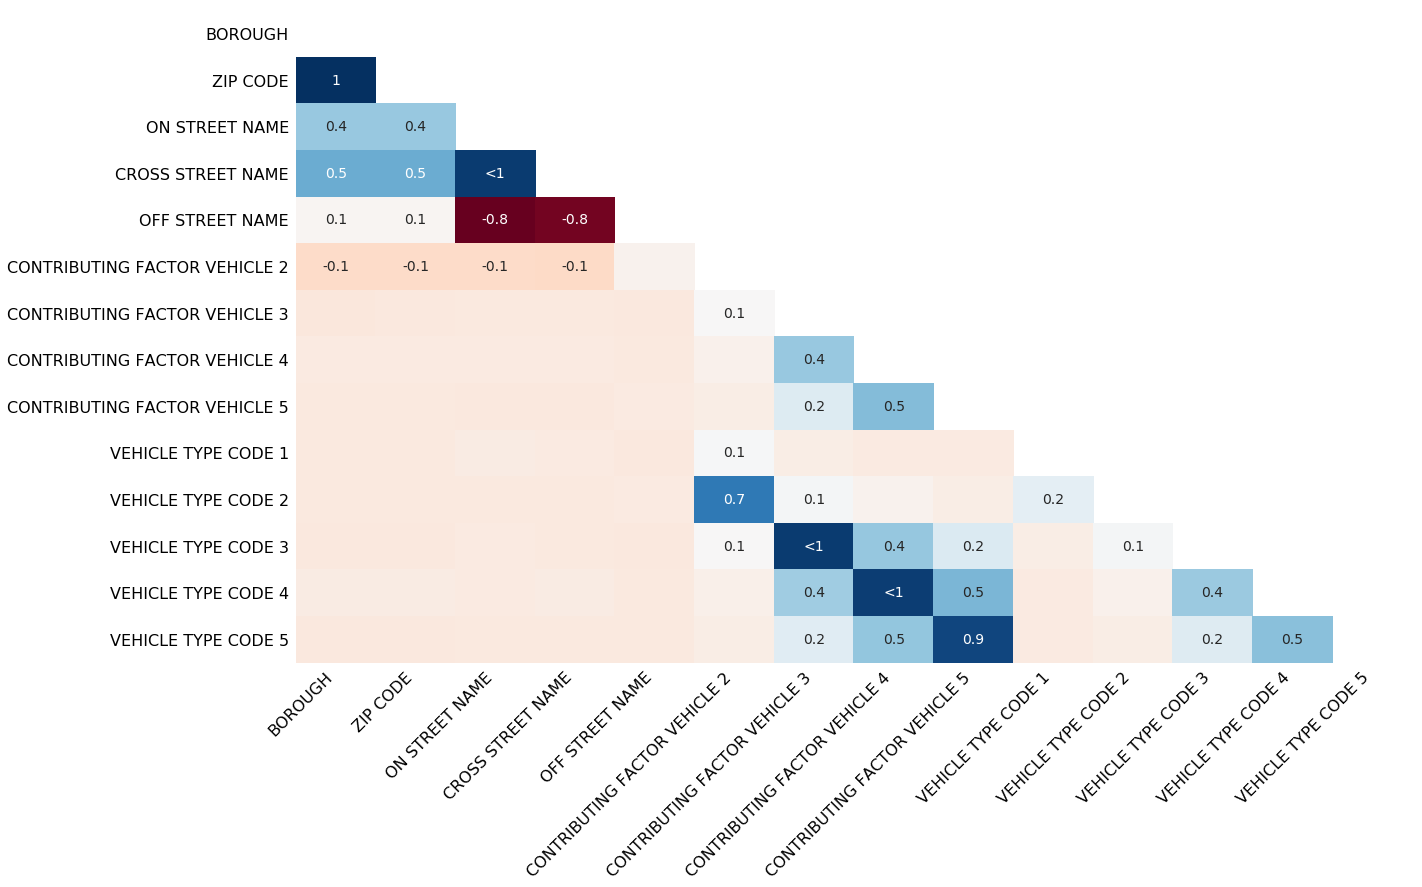

In [7]:
msno.heatmap(collisions)

In this example, it seems that reports which are filed with an `OFF STREET NAME` variable are less likely to have complete
geographic data.

Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing
or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization&mdash;in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked `<1` or `>-1` are have a correlation that is close to being exactingly negative or positive, but is
still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For
example, in this dataset the correlation between `VEHICLE CODE TYPE 3` and `CONTRIBUTING FACTOR VEHICLE 3` is `<1`,
indicating that, contrary to our expectation, there are a few records which have one or the other, but not both.
These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power
is limited when it comes t

### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise
ones visible in the correlation heatmap:

In [ ]:
msno.dendrogram(collisions)

The dendrogram uses a [hierarchical clustering algorithm](http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)
(courtesy of `scipy`) to bin variables against one another by their nullity correlation (measured in terms of
binary distance). At each step of the tree the variables are split up based on which combination minimizes the
distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to
zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of
zero fully predict one another's presence&mdash;one variable might always be empty when another is filled, or they
might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the
variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If
your own interpretation of the dataset is that these columns actually *are* or *ought to be* match each other in
nullity (for example, as `CONTRIBUTING FACTOR VEHICLE 2` and `VEHICLE TYPE CODE 2` ought to), then the height of the
cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed&mdash;that is,
 how many values you would have to fill in or drop, if you are so inclined.

As with `matrix`, only up to 50 labeled columns will comfortably display in this configuration. However the
`dendrogram` more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

### Geoplot

One kind of pattern that's particularly difficult to check, where it appears, is geographic distribution. `missingno`
supports visualizing geospatial data nullity patterns with a geoplot visualization. This is an experimental data 
visualization type, and requires the [`geoplot`](https://github.com/ResidentMario/geoplot) and [`geopandas`](http://geopandas.org/) 
libraries. These are optional dependencies are must be installed separately from the rest of `missingno`. Once you 
have them you can run:

In [ ]:
msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE')

If no geographical context can be provided, `geoplot` will compute a
[quadtree](https://en.wikipedia.org/wiki/Quadtree) nullity distribution, as above, which splits the dataset into
statistically significant chunks and colorizes them based on the average nullity of data points within them. In this
case there is good evidence that the distribution of data nullity is mostly random: the number of values left blank 
varies across the space by only 5 percent, and the differences look randomly distributed.

Quadtrees have the advantage that they don't require any information about the space besides latitude/longitude 
pairs. Given enough data (hundreds of thousands of records), 
[a geoplot can even reconstruct the space being mapped](https://i.imgur.com/4dtGhig.png). It works less well for 
small datasets like this sample one.

If you can specify a geographic grouping within the dataset, you can plot your data as a set of minimum-enclosure 
[convex hulls](https://en.wikipedia.org/wiki/Convex_hull) instead:

In [ ]:
msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE', by='ZIP CODE')

Convex hulls are usually more interpretable than the quadtree, especially when the underlying dataset is relatively 
small (as this one is). We again see a data nullity distribution that's seemingly at random, giving us confidence 
that the nullity of collision records is not geographically variable.

The `msno.geoplot` chart type extends the `aggplot` function in the `geoplot` package, and accepts keyword arguments 
to the latter as parameters. [The `geoplot` documentation provides further details](https://residentmario.github.io/geoplot/index.html) 
(including how to pick [a better map projection](https://i.imgur.com/0aaNa9Q.png)). For more advanced configuration 
details for the rest of the plot types, refer to the `CONFIGURATION.md` file in this repository.

That concludes our tour of `missingno`!

## Contributing

For thoughts on features or bug reports see [Issues](https://github.com/ResidentMario/missingno/issues). If 
you're interested in contributing to this library, see details on doing so in the `CONTRIBUTING.md` file in this 
repository.